In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
df = pd.read_csv('cleaned_chocolate_data1.csv')
path = ...\6.1'

In [46]:
# Select numerical columns
df_numeric = df[['ref', 'review_date', 'cocoa_percent', 'rating']]

In [47]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

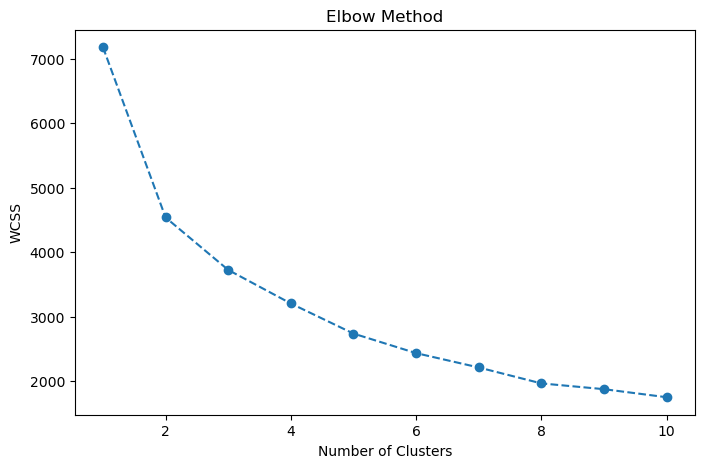

In [59]:
# Step 3
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
# Step 4

#### Explanation of Cluster Choice
- The elbow plot shows a sharp decline in WCSS up to 3 clusters, after which the rate of decrease slows down significantly.
- This suggests that 3 clusters are optimal for this dataset, as adding more clusters does not significantly improve the model's performance.

In [70]:
# Step 5
# Choose the number of clusters (e.g., 3)
k = 3

# Run k-means
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Attach the cluster labels to the original dataframe
df['Cluster'] = clusters

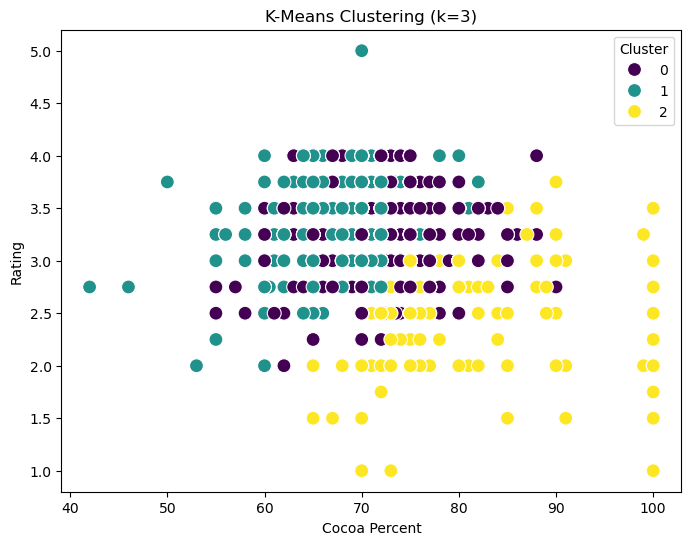

In [71]:
# Step 6
# Scatterplot of 'cocoa_percent' vs 'rating' colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['cocoa_percent'], y=df['rating'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

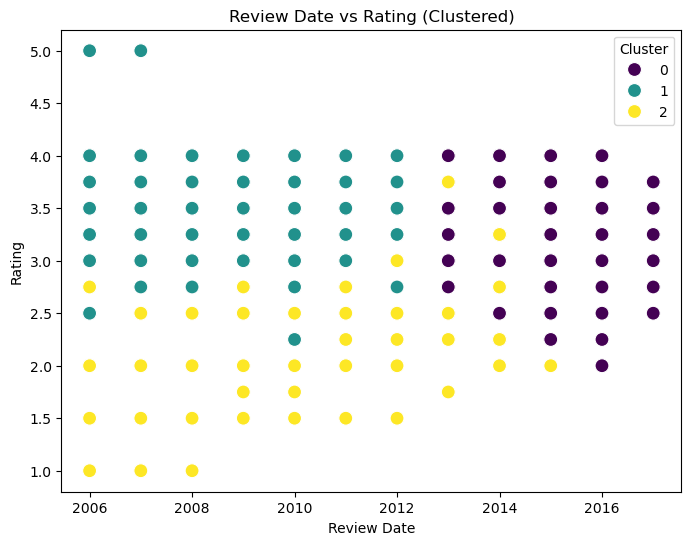

In [72]:
# Step 7
# Scatterplot of 'review_date' vs 'rating' colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['review_date'], y=df['rating'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Review Date vs Rating (Clustered)')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()

...\ipykernel_90300\2805551467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['rating'], palette='viridis')


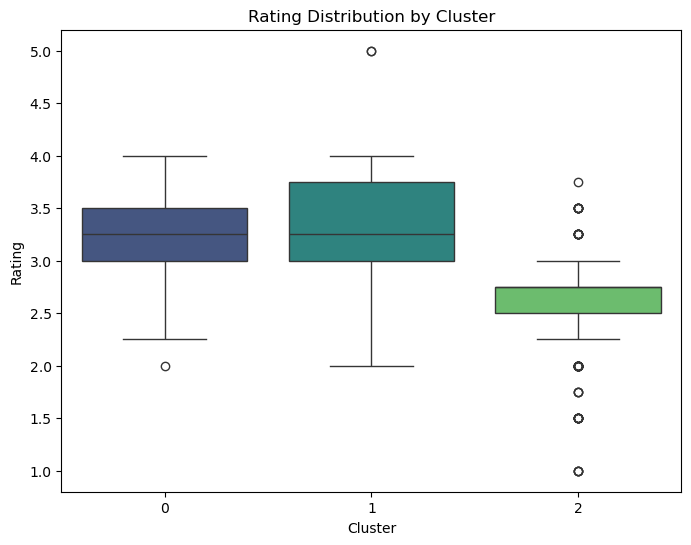

In [73]:
# Boxplot of 'rating' by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Cluster'], y=df['rating'], palette='viridis')
plt.title('Rating Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()

In [74]:
# Descriptive statistics for each cluster
cluster_stats = df.groupby('Cluster')[['cocoa_percent', 'rating', 'review_date']].mean()
print(cluster_stats)

         cocoa_percent    rating  review_date
Cluster                                      
0            71.495130  3.242424  2014.662338
1            69.037037  3.344203  2009.579710
2            79.060000  2.584000  2010.508000


#### Insights from Cluster Analysis
- **Cluster 1**: Lower cocoa percentages and higher ratings. These chocolates are sweeter and more popular among consumers.
- **Cluster 0**: Moderate cocoa percentages and ratings. These chocolates represent mainstream products.
- **Cluster 2**: Higher cocoa percentages and lower ratings. These chocolates are less popular due to their bitterness.
- **Key Takeaway**: Consumers prefer chocolates with moderate to low cocoa percentages, as they are less bitter and more palatable.
    Newer chocolates are rated lower than older ones, suggesting a possible decline in quality or a shift in consumer preferences.

#### Summary of Findings
- **Cocoa Percentage and Rating**:
  Lower cocoa percentages are associated with higher ratings, while higher cocoa percentages are associated with lower ratings.
  This suggests that consumers prefer sweeter chocolates over bitter ones.

- **Review Date and Rating**:
  Older chocolates tend to have higher ratings, while newer chocolates have moderate to low ratings.
  This could indicate a decline in quality over time or a shift in consumer preferences.

- **Rating Distribution**:
Cluster 1 has the highest and most consistent ratings, Cluster 0 has moderate ratings with more variability, and Cluster 2 has the lowest ratings.

#### Proposed Next Steps
- **Consumer Preference Analysis**:  
 Investigate why chocolates with lower cocoa percentages are more popular. Conduct surveys or focus groups to understand consumer preferences.

- **Temporal Trends**:  
 Explore why newer chocolates are rated lower than older ones. Has the quality of chocolates declined over time, or have consumer tastes changed?

- **Product Improvement**:  
 For Cluster 2 (high cocoa, low ratings), experiment with recipes to make high-cocoa chocolates more palatable (e.g., adding sweeteners or flavorings).

- **Feature Engineering**:  
 Use the Cluster column as a feature in predictive models to predict chocolate ratings or sales.

- **Further Analysis**:  
 Explore the impact of other variables (e.g., bean_type, bean_origin, specific_origin) on ratings and cocoa percentages.